In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [159]:

df = pd.read_csv(r'C:\Users\Siddharth\Downloads\heart.csv')

In [161]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [183]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [185]:
le = LabelEncoder()

In [211]:
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['Sex'] = le.fit_transform(df['Sex'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])


In [213]:
X = df.drop('HeartDisease' , axis = 'columns')
Y = df['HeartDisease']
X.shape

(918, 11)

In [259]:
Y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [217]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [241]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
x_final = pca.fit_transform(x_scaled)

In [293]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC


In [295]:
from sklearn.model_selection import cross_val_score
models = [LR() , SVC() , RFC()]
for model in models:
    print(model , np.mean(cross_val_score(model,x_final , Y)))

LogisticRegression() 0.808232359230221
SVC() 0.827815395580898
RandomForestClassifier() 0.8136968401045379


In [303]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x_final , Y , test_size = 0.2)

In [327]:
y_test.shape

(184,)

In [309]:
model = SVC()
model.fit(x_train , y_train)

SVC()

In [311]:
model.score(x_test , y_test)

0.907608695652174

In [313]:
y_pred = model.predict(x_test)

In [319]:
from sklearn.metrics import confusion_matrix as CM
import seaborn as sn
cm = CM(y_test , y_pred)
cm

array([[73, 10],
       [ 7, 94]], dtype=int64)

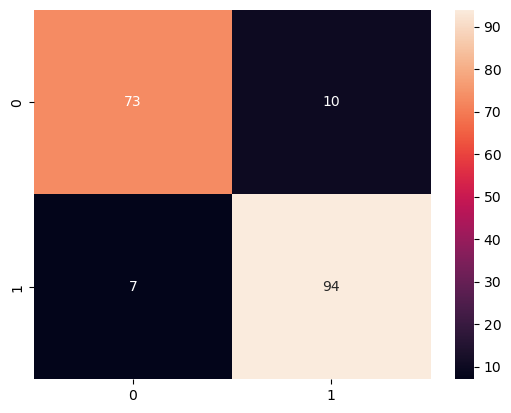

In [325]:
import seaborn as sn
sn.heatmap(cm , annot = True)
plt.xlabel = 'Predicted'
plt.ylabel = 'Truth'
